# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

# **Importing Libraries**

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
df = pd.read_excel(r"C:\Users\Lenovo\Downloads\DataScience_K-mean_clustering\Online Retail.xlsx")

# Display dataset shape and first few rows
print("Dataset Shape:", df.shape)

Dataset Shape: (541909, 8)


In [8]:
#checking top 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
#checking bottom 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [12]:
#checking shape of dataset
df.shape

(541909, 8)

In [14]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**As we can see we have mos tof null values in customerID and all other columns looks fine. we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense**

In [16]:
#columns of dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## **Data Cleaning**

**Checking for null values**

In [18]:
#checking for null values in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

***Here we have null values present in our dataset like in CustomerID and Description.we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense***

In [20]:
#dropping null values
df.dropna(inplace=True)

In [22]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [26]:
#checking shape
df.shape

(406829, 8)

***After removing null value from our dataset.***

***Now we have 406829 rows and 8 columns in our dataset.***

In [28]:
#changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [30]:
df=df[~df['InvoiceNo'].str.contains('C')]

***Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.***

In [32]:
df.shape

(397924, 8)

In [34]:
#checking summary
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


# **Exploratory data analysis**

**Description Name**

In [38]:
# Ensure that the DataFrame is correctly renamed
Description_df = df['Description'].value_counts().reset_index()
Description_df.columns = ['Description_Name', 'Count']

# Check the first few rows to confirm the column names and data
print(Description_df.head())

                     Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1724
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1397


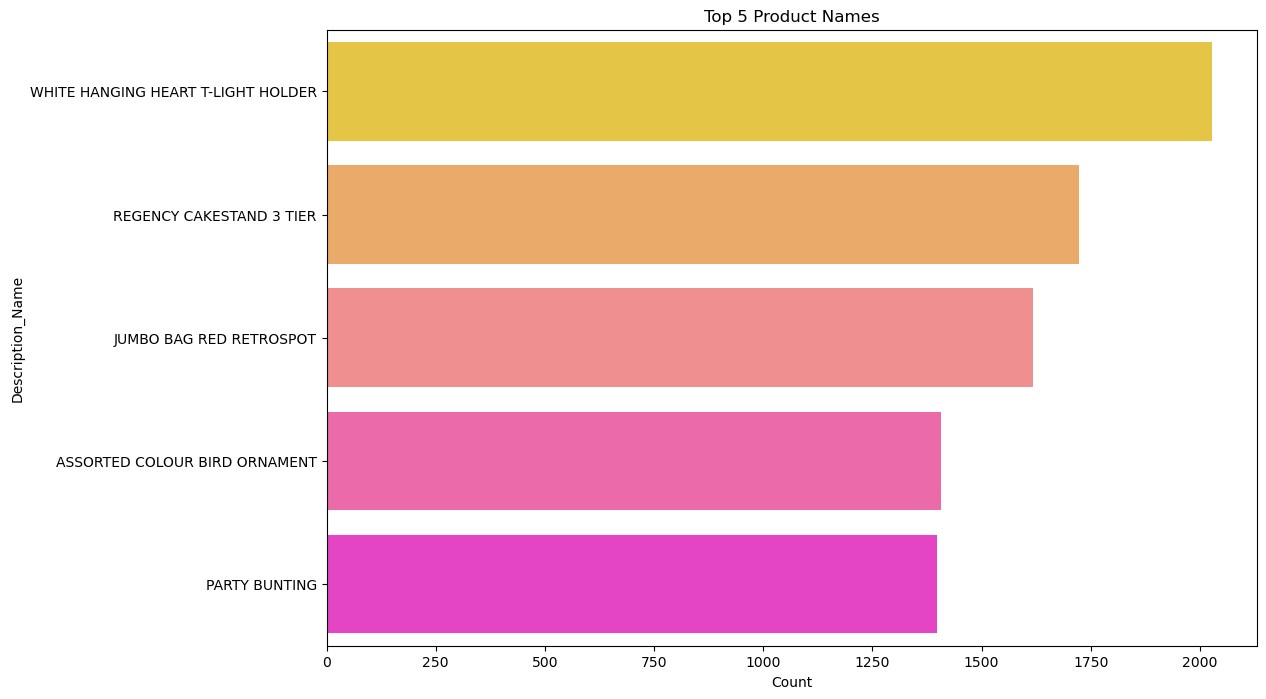

In [40]:
plt.figure(figsize=(12, 8))
plt.title('Top 5 Product Names')
sns.barplot(x=Description_df.columns[1], y=Description_df.columns[0], data=Description_df.head(5), palette='spring_r')
plt.show()


### **Top product based on maximum selling are :**
1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

In [42]:
#bottom 5 description name
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1



### **Bottom 5 Product based on the selling are:**
1. RUBY GLASS CLUSTER EARRINGS

2. PINK CHRYSANTHEMUMS ART FLOWER

3. 72 CAKE CASES VINTAGE CHRISTMAS

4. WALL ART , THE MAGIC FOREST

5. PAPER CRAFT , LITTLE BIRDIE

**StockCode Name**

In [44]:
StockCode_df = df['StockCode'].value_counts().reset_index()

# Rename the columns in one step
StockCode_df.columns = ['StockCode_Name', 'Count']

# Check the top 5 rows
print(StockCode_df.head())

  StockCode_Name  Count
0         85123A   2035
1          22423   1724
2         85099B   1618
3          84879   1408
4          47566   1397


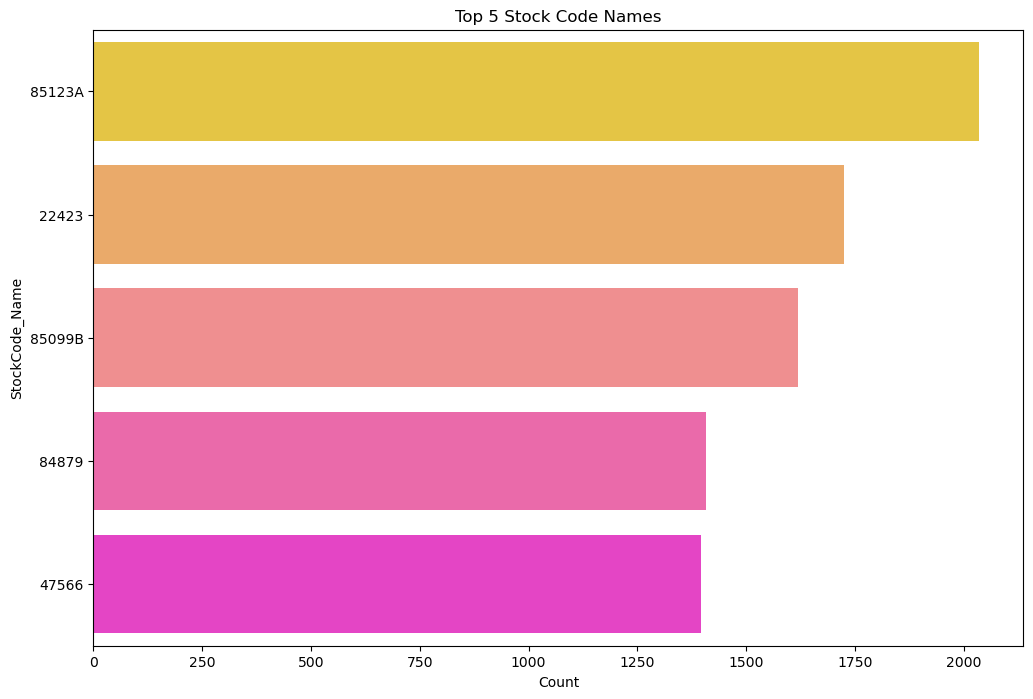

In [46]:
plt.figure(figsize=(12, 8))
plt.title('Top 5 Stock Code Names')
sns.barplot(x='Count', y='StockCode_Name', data=StockCode_df.head(5), palette='spring_r')
plt.show()


### **Top 5 Stock name based on selling are :**
1.85123A

2.22423

3.85099B 

4.84879

5.4756

In [48]:
#bottom 5 stockcode name
StockCode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


**Country Name**

In [50]:
country_df = df['Country'].value_counts().reset_index()

# Rename columns in one step
country_df.columns = ['Country_Name', 'Count']

# Check the top 5 rows
print(country_df.head())


     Country_Name   Count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485


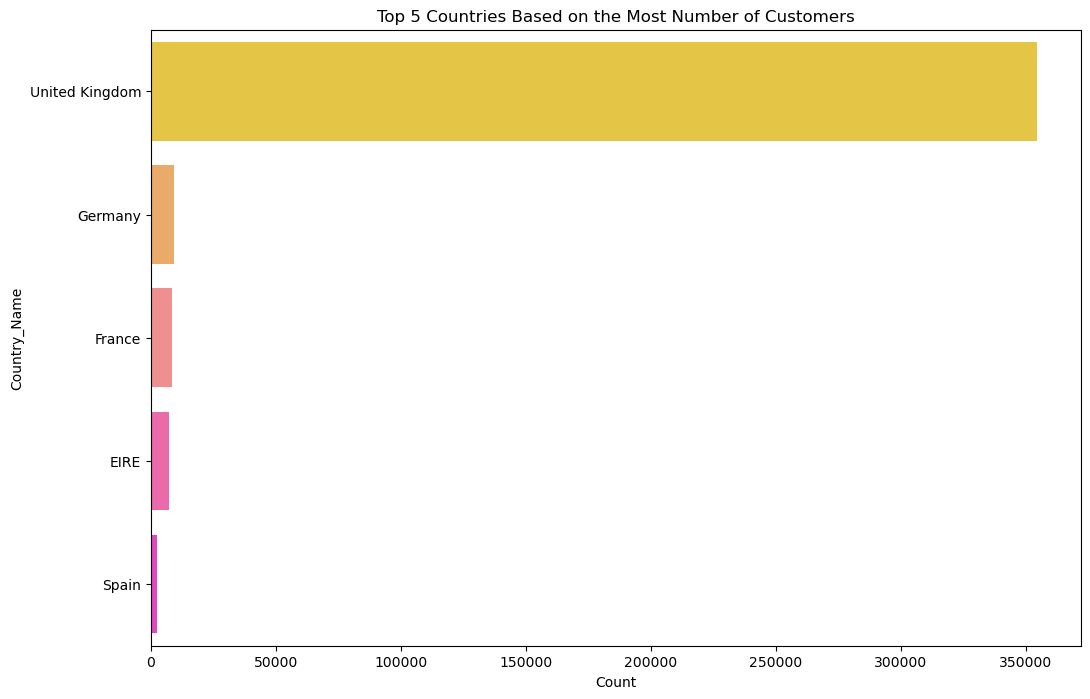

In [52]:
# Plot the top 5 countries based on the most customers
plt.figure(figsize=(12, 8))
plt.title('Top 5 Countries Based on the Most Number of Customers')
sns.barplot(x='Count', y='Country_Name', data=country_df.head(5), palette='spring_r')
plt.show()


***From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain***

In [54]:
#bottom 5 country name
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


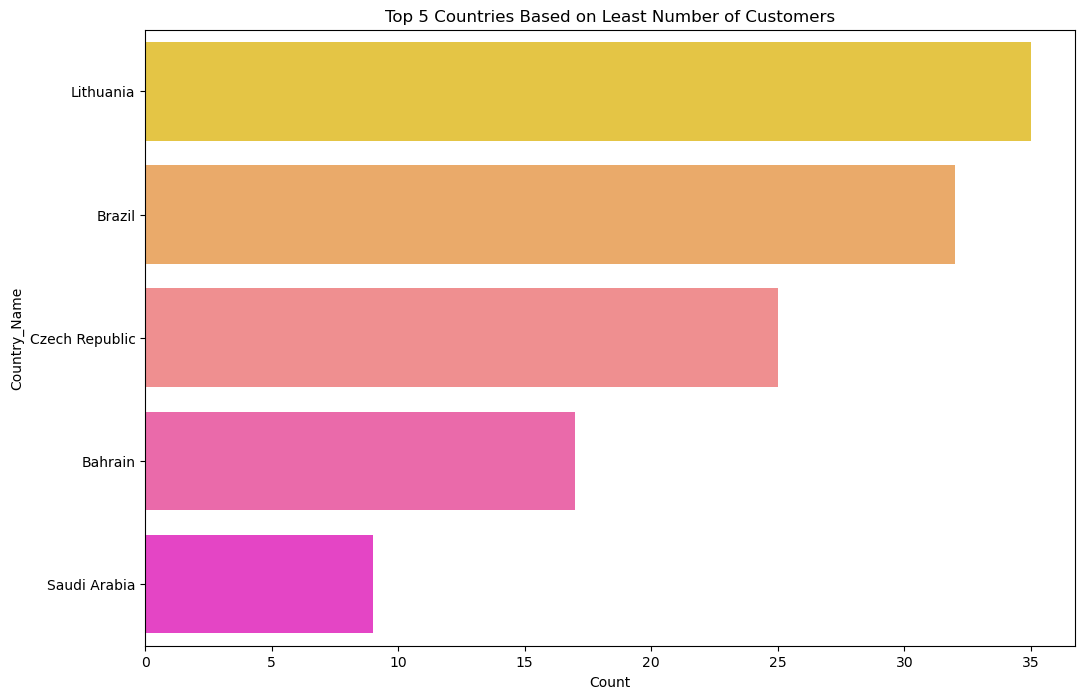

In [56]:
# Plot the bottom 5 countries based on the least number of customers
plt.figure(figsize=(12, 8))
plt.title('Top 5 Countries Based on Least Number of Customers')
sns.barplot(x='Count', y='Country_Name', data=country_df.tail(5), palette='spring_r')
plt.show()


***From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia***

**Distribution of Quantity**

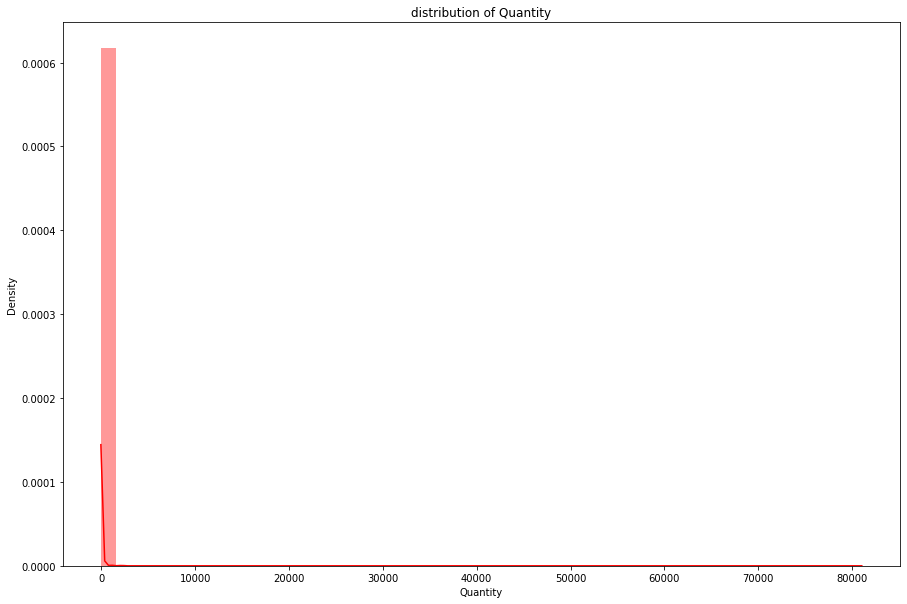

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

***Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution***

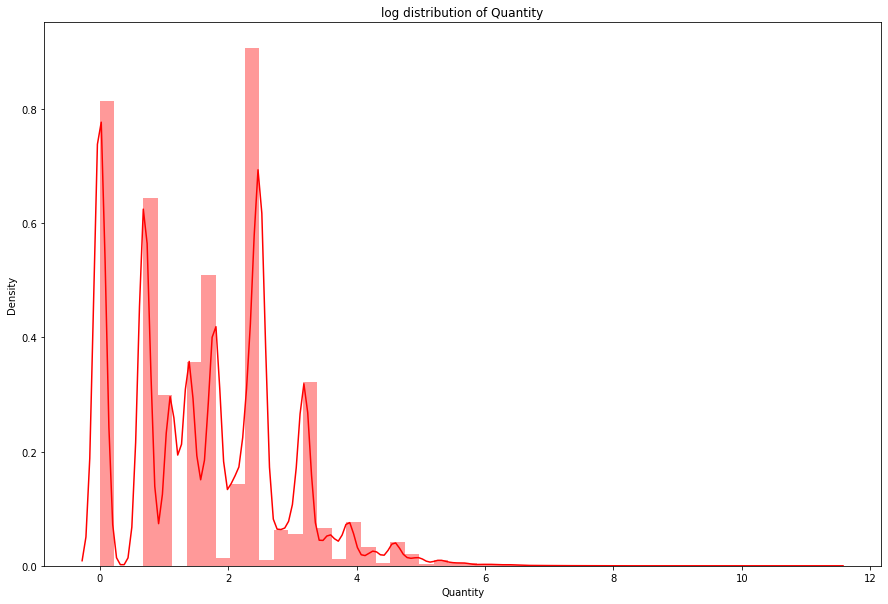

In [ ]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

**Distribution of Unit Price**

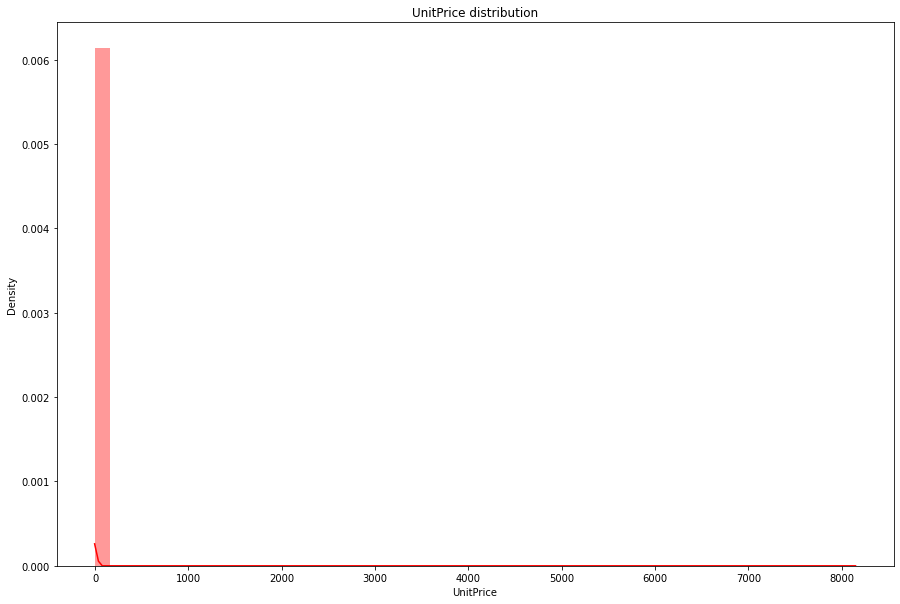

In [ ]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

***From the distribution of unit price, we can say that most items have a lower price range.***

> Indented block



In [58]:
#checking for unit price less than 0
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# **Feature engineering**

In [60]:
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [62]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [64]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34


**Distribution of total amount**

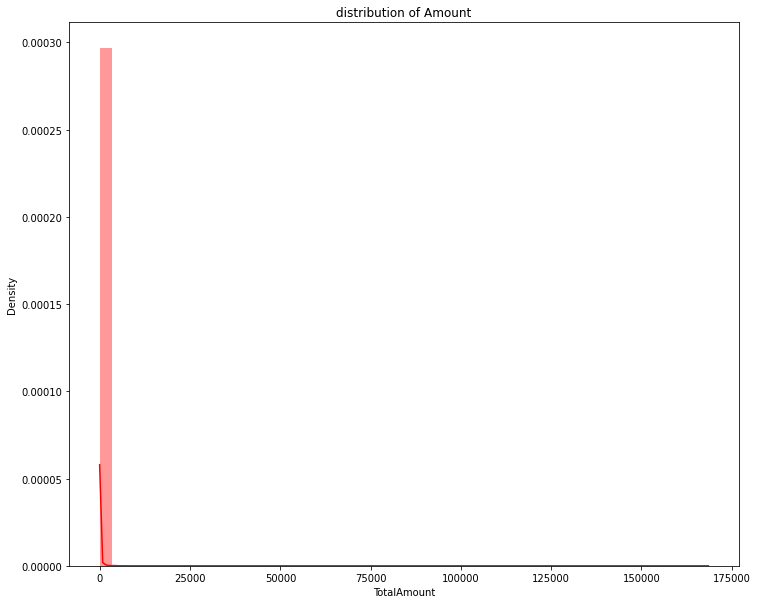

In [ ]:
#checking distribution for Totalamount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="r");

**Months**

In [68]:
#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Count,count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


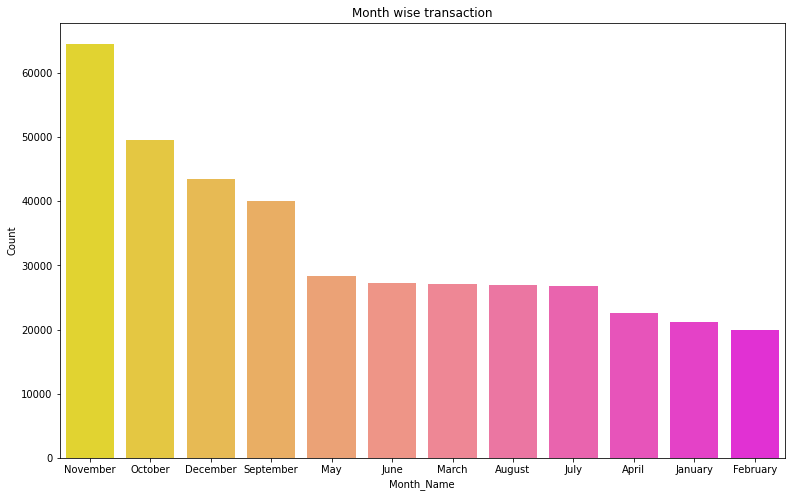

In [ ]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

♦ ***Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.***

♦ ***Least numbers of purchasing are in the month of April and February.***

**Days**

In [70]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Count,count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


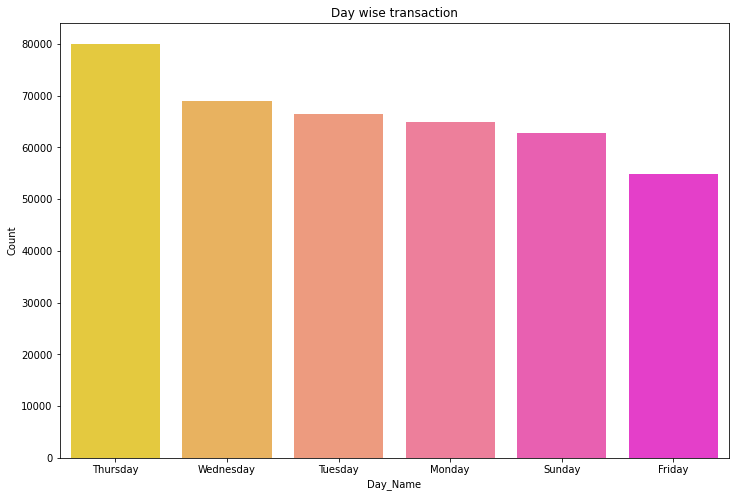

In [ ]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

**We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.**

**Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.**

**Hour**

In [72]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

,Count,count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


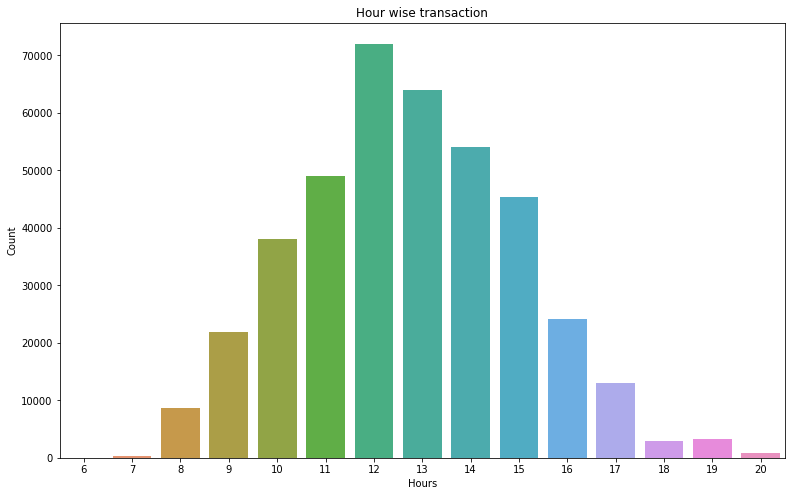

In [ ]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

**From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.**

In [74]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [76]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

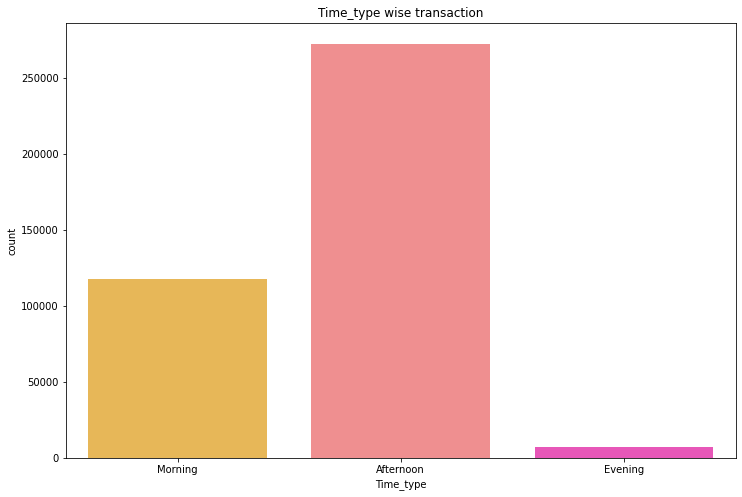

In [ ]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='spring_r');

 ***Most of the customers have purchased the items in Afternoon.*** 

***Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can do one thing provide the offers/discounts at evening***

# **Create the RFM model (Recency, Frequency,Monetary value)**

### **RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.**

**RFM stands for the three dimensions:**

### **Recency – How recently did the customer purchase?**

### **Frequency – How often do they purchase?**

### **Monetary – How much do they spend?**

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [78]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [80]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

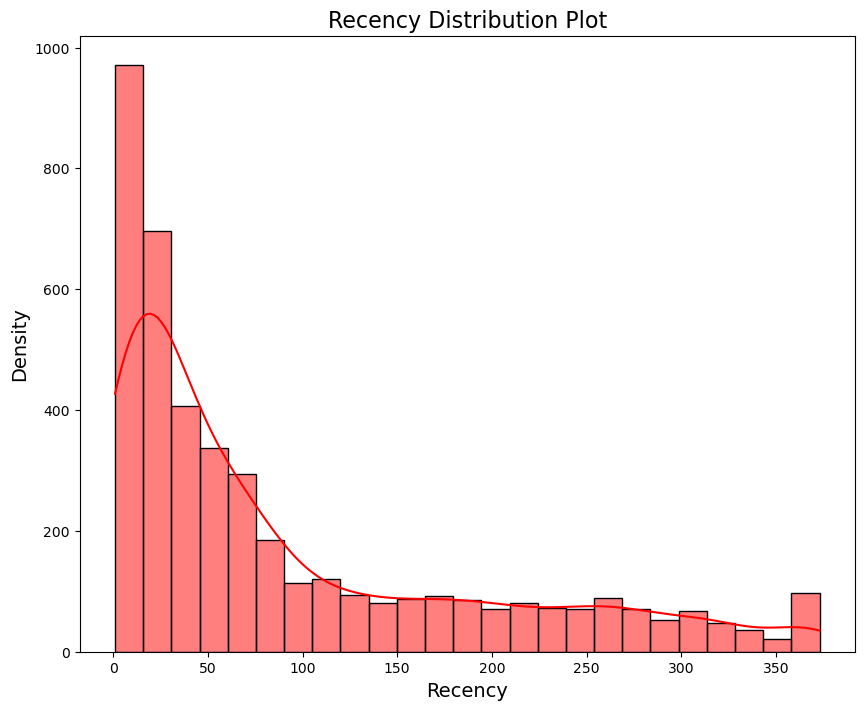

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(10, 8))
plt.title('Recency Distribution Plot', fontsize=16)
sns.histplot(x, color='r', kde=True)
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


In [112]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

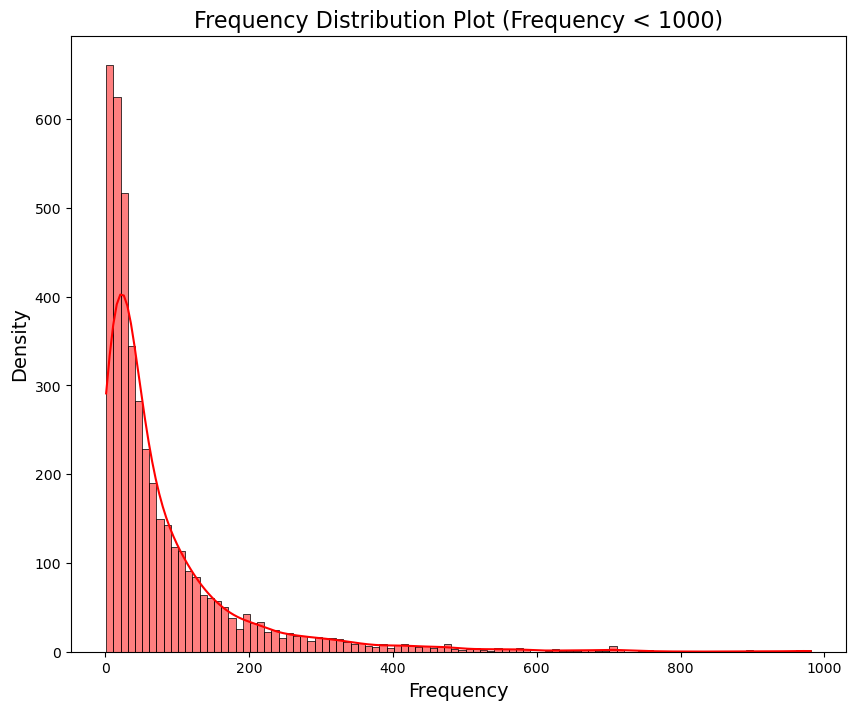

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency distribution plot for observations with frequency < 1000
x = rfm_df[rfm_df['Frequency'] < 1000]['Frequency']
plt.figure(figsize=(10, 8))
plt.title('Frequency Distribution Plot (Frequency < 1000)', fontsize=16)
sns.histplot(x, color='r', kde=True)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


In [116]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2053.793248
std        8988.248329
min           1.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

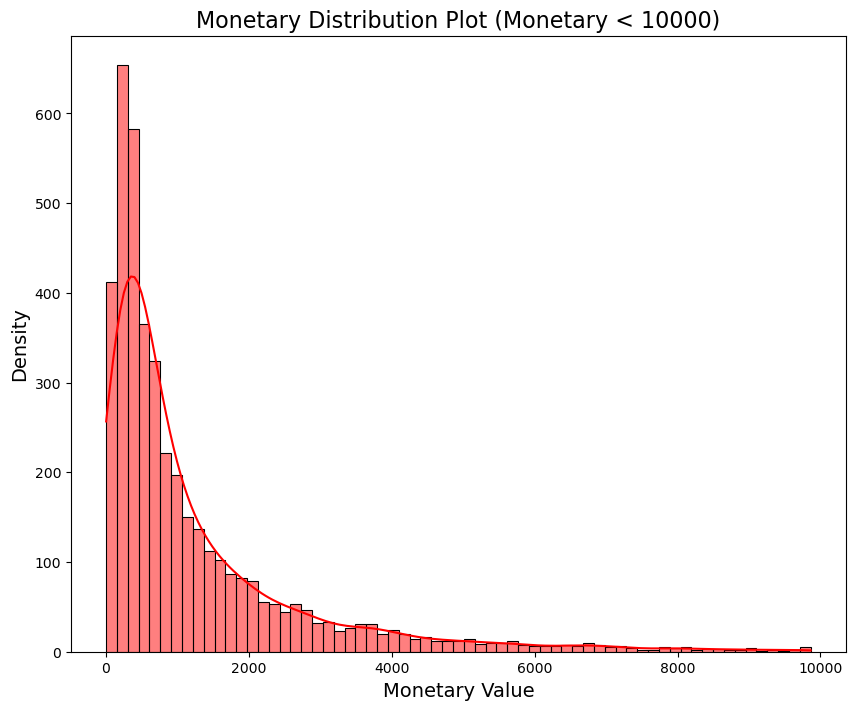

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monetary distribution plot for observations with monetary value < 10000
x = rfm_df[rfm_df['Monetary'] < 10000]['Monetary']
plt.figure(figsize=(10, 8))
plt.title('Monetary Distribution Plot (Monetary < 10000)', fontsize=16)
sns.histplot(x, color='r', kde=True)
plt.xlabel('Monetary Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


***From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.***

## **Splitting into four segments using quantiles.**

In [135]:
# Ensure you're only working with numeric columns
numeric_rfm_df = rfm_df.select_dtypes(include=[float, int])

# Split into four segments using quantiles
quantiles = numeric_rfm_df.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()


In [137]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64},
 'R': {0.25: 1.0, 0.5: 2.0, 0.75: 3.5},
 'F': {0.25: 2.0, 0.5: 3.0, 0.75: 4.0},
 'M': {0.25: 1.5, 0.5: 3.0, 0.75: 3.5},
 'RFMScore': {0.25: 5.0, 0.5: 8.0, 0.75: 10.0}}

In [139]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [141]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [143]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [149]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

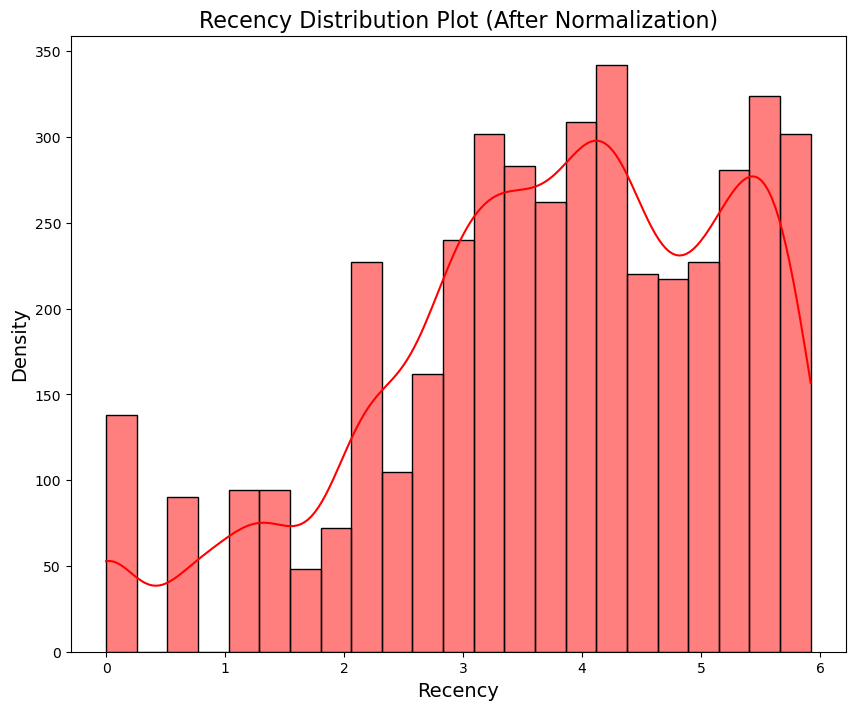

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data distribution after normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10, 8))
sns.histplot(Recency_Plot, color='r', kde=True)  # kde=True adds a smooth curve
plt.title('Recency Distribution Plot (After Normalization)', fontsize=16)
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()  # Display the plot once


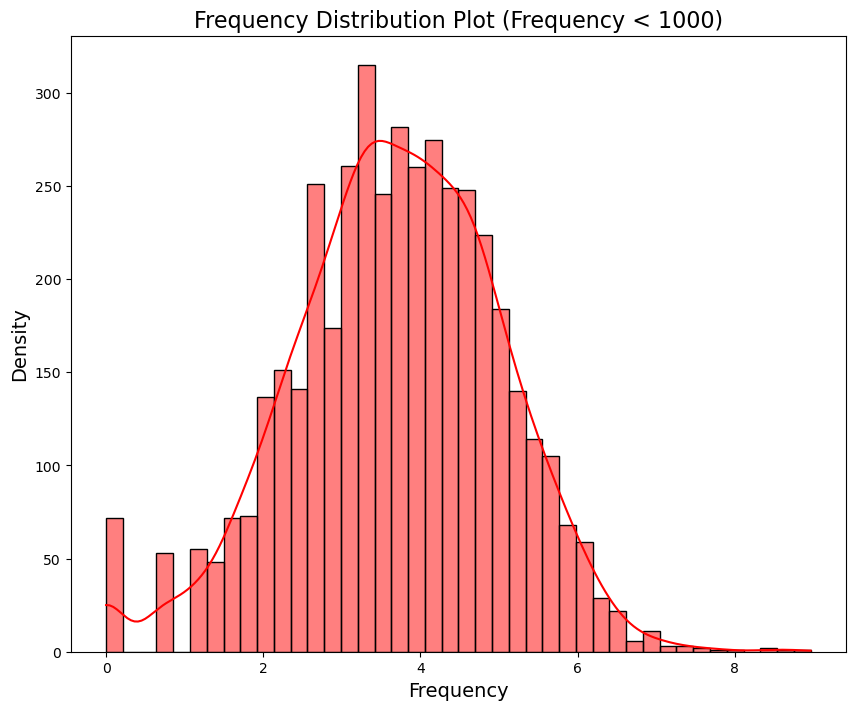

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data distribution after normalization for Frequency (Frequency < 1000)
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10, 8))
sns.histplot(Frequency_Plot, color='r', kde=True)  # kde=True adds a smooth curve
plt.title('Frequency Distribution Plot (Frequency < 1000)', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()  # Display the plot once


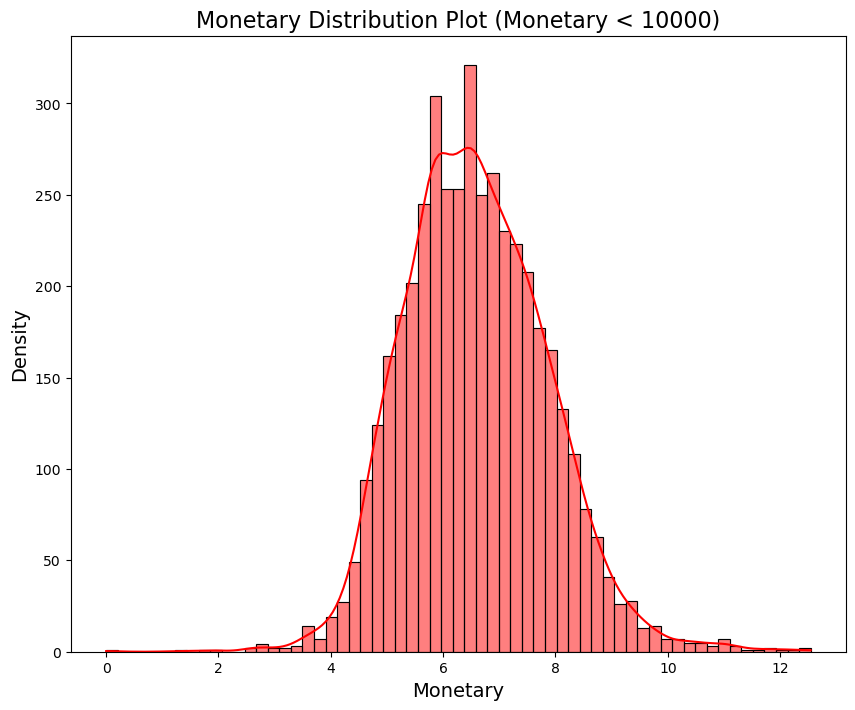

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data distribution after normalization for Monetary (Monetary < 10000)
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10, 8))
sns.histplot(Monetary_Plot, color='r', kde=True)  # kde=True adds a smooth curve
plt.title('Monetary Distribution Plot (Monetary < 10000)', fontsize=16)
plt.xlabel('Monetary', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()  # Display the plot once


***As we can see from the above plots, skewness has been removed from the data.***



In [159]:
import math
import numpy as np

# Apply log transformation with a small constant to avoid issues with zero values
rfm_df['Recency_log'] = rfm_df['Recency'].apply(lambda x: math.log(x + 1) if x >= 0 else np.nan)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(lambda x: math.log(x + 1) if x >= 0 else np.nan)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(lambda x: math.log(x + 1) if x >= 0 else np.nan)
